## Prediksi Apakah Berita Hoax atau Fakta Using Simple NLP 🤨 🧐

In [1]:
import os
import warnings
from pyforest import *
warnings.filterwarnings('ignore')

In [2]:
path = 'C:/Users/ASUS/kode/projek/Prediksi_Berita Hoax atau Tidak/'

In [3]:
df = pd.read_csv(os.path.join(path, 'news_supervised_data.csv'))
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


### EDA & Cleaning
Periksa apakah data itu imbalance

In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

sekitar 2500 an data yang missing values. Sepertinya kita akan hapus aja

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(18285, 5)

In [7]:
# periksa distribusi data apakah imbalance labelnya
from collections import Counter

In [8]:
# sebelum itu pastiin si tipe data target itu str atau kategorikal

df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [9]:
df['label'] = df['label'].astype(str)

In [10]:
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

In [11]:
df['label'].unique()

array(['1', '0'], dtype=object)

In [12]:
class_counts = Counter(df['label'])
print(class_counts)

Counter({'0': 10361, '1': 7924})


Sepertinya data tersebut tidaklah imbalance. Kita bisa lanjutt

In [13]:
# sebelum kita stemming, kita harus pastiin datanya benar-benar berurutan indeksnya
berita = df.copy()

In [14]:
berita.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


kita lihat di data tersebut tidak ada indeks 6 atau 8 dikarenkaan sudah dihapus karena missing. Sehingga kita perlu reset indeksnya untuk semua record data

In [15]:
berita.reset_index(inplace=True)

In [16]:
berita.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [17]:
berita.drop(['index', 'id'], axis=1, inplace=True)

In [18]:
berita.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


### Variabel Independen 'Title'
#### Mengubah fitur 'title' menjadi number

Jadi intinya aku mau ngubah data pada fitur 'title' sehingga memiliki vector representation dari setiap record data. Sehingga nantinya bisa kita terapin ke model yang ingin dibuat. Tapi disini aku putusin untuk pakai satu variabel independen yaitu 'title' terlebih dahulu, karena pengen lihat pengaruhnya 

In [19]:
berita['title'][82]

"Whether it's John McCain, Mitt Romney or Donald Trump, Democrats always run 'War on Women' tactic to destroy the Republican candidate"

### Stemming
Stemming adalah salah satu teknik penting dalam pemrosesan bahasa alami (NLP) yang digunakan untuk mengurangi kata-kata ke bentuk dasarnya atau 'akar kata', yang disebut sebagai 'kata dasar'. Ini dilakukan dengan menghapus infleksi kata, akhiran, dan awalan sehingga kata-kata dengan akar yang sama akan diidentifikasi sebagai bentuk yang sama.

In [20]:
berita_82 = berita['title'][82]

kita hapus jika ada kata spesial atau regular expression

In [21]:
import re

In [22]:
# sub = substitute: parameter, replace string, datanya
re.sub('[^a-zA-Z]',' ', berita_82)


# kecuali lower dari a-z dan kapital A-Z itu akan direplace dengan ' '

'Whether it s John McCain  Mitt Romney or Donald Trump  Democrats always run  War on Women  tactic to destroy the Republican candidate'

#### Tokenization
Akan membagi data kita menjadi beberapa token dalam list array

In [23]:
pisah = berita_82.split()
pisah

['Whether',
 "it's",
 'John',
 'McCain,',
 'Mitt',
 'Romney',
 'or',
 'Donald',
 'Trump,',
 'Democrats',
 'always',
 'run',
 "'War",
 'on',
 "Women'",
 'tactic',
 'to',
 'destroy',
 'the',
 'Republican',
 'candidate']

In [24]:
!pip install nltk

mltk itu tentang natural language toolkit

In [25]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Stopwords adalah kata-kata umum yang sering muncul dalam teks dan biasanya tidak memiliki makna yang signifikan dalam analisis teks. Contoh stopwords dalam bahasa Inggris adalah "the", "is", "at", "which", "on", "in", dan sebagainya.

In [26]:
steming = PorterStemmer()

Stemming itu menurut aku suatu teknik untuk mengubah suatu data menjadi sebuah list array untuk siap diolah lebih lanjut

In [27]:
review = [steming.stem(word) for word in pisah if word not in set(stopwords.words('english'))]
review

['whether',
 'john',
 'mccain,',
 'mitt',
 'romney',
 'donald',
 'trump,',
 'democrat',
 'alway',
 'run',
 "'war",
 "women'",
 'tactic',
 'destroy',
 'republican',
 'candid']

Jadi kata apapun yang memnuhi kondisi diatas itu akan digunakan pada proses stemming. disini kita udah dapat sebuah list array dari kata-kata yang ada pada indeks 'title' ke-82. Kita tinggal terapin ke semuanya

In [28]:
# pastiin kalau ketika disatuin lagi itu aman
' '.join(review)

"whether john mccain, mitt romney donald trump, democrat alway run 'war women' tactic destroy republican candid"

#### jadi output itulah yang akan dikirimkan kedalam model kita karena sudah menjadi 'vector representation'

In [29]:
corpus = []
kalimat = []

In [30]:
len(berita)

18285

In [31]:
# untuk semua record data
for i in range(0,len(berita)):
    
    #substitute kata uniknya menjadi ' '
    review = re.sub('[^a-zA-Z]', ' ', berita['title'][i])
    
    #lowercase
    review = review.lower()
    
    pisah = review.split()
    
    #stemming
    review = [steming.stem(word) for word in pisah if word not in set(stopwords.words('english'))]
    
    #tampung
    kalimat = ' '.join(review)
    
    corpus.append(kalimat)

In [32]:
corpus[78]

'fiction podcast worth listen new york time'

In [33]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [34]:
len(corpus)

18285

### Feature Extraction

#### Ubah menjadi Angka
- teknik bag of words
- menggunakan countvectorizer

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

cvr = CountVectorizer(max_features=5000, ngram_range=(1,3))


# max_features itu aku hanya menggunakan 5000 fitur teratas
# ngram_range itu dari suatu corpus itu nanti diambil range dari 1 kata, lalu 2 kata, lalu 3 kata

setiap karakter dalam teks akan dianggap sebagai fitur yang akan diekstrak menjadi numerik atau
#### Vektor Representasi

In [36]:
X = cvr.fit_transform(corpus).toarray() #ingat harus diubah menjadi array atau vektor

In [37]:
X.shape

(18285, 5000)

nah disini kita udah dapet 5000 top fitur dari corpus. aku coba 5000 teratas dulu

In [38]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
cvr.get_feature_names_out()[0:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

kita pake fungsi get_features_names_out yang merupakan versi terbaru untuk mengambil 20 fitur pertama dari corpus dengan data 'title'

In [40]:
# disini kita udah dapet variabel independen, lalu tinggal tentuin variabel dependen
berita.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [41]:
y = berita['label']

In [42]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: object

### Kesimpulan Preprocessing dengan BoW
Teknik Bag of Words (BoW) adalah salah satu teknik yang digunakan dalam pemrosesan bahasa alami (NLP) untuk menganalisis dan merepresentasikan teks secara numerik. Konsepnya cukup sederhana: kita mengubah teks menjadi vektor yang terdiri dari frekuensi kemunculan setiap kata dalam teks.

- Tokenisasi: Pertama, kita pecah setiap kalimat menjadi kata-kata individual. Misalnya, untuk kalimat pertama, kita akan memiliki token: ["Saya", "suka", "belajar", "pemrograman"].
- Membangun vocabulary: Kedua, kita bangun sebuah kamus atau vocabulary yang berisi setiap kata unik dari semua kalimat. Dalam contoh ini, vocabulary akan terdiri dari: ["Saya", "suka", "belajar", "pemrograman", "adalah", "menyenangkan"]
- Representasi vektor: Setiap kalimat kemudian direpresentasikan sebagai vektor, di mana setiap elemen vektor menunjukkan frekuensi kemunculan kata dalam kalimat. Misalnya, untuk kalimat pertama, vektornya akan menjadi [1, 1, 1, 1, 0, 0], karena setiap kata muncul tepat satu kali dalam kalimat. Sedangkan untuk kalimat kedua, vektornya akan menjadi [0, 0, 0, 1, 1, 1].


### Modeling

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
X_train.shape

(13713, 5000)

In [46]:
X_test.shape

(4572, 5000)

#### Naive Bayes
*catatan:
Dalam Naive Bayes, kita tidak hanya memperhitungkan probabilitas kondisional untuk setiap fitur, tetapi juga probabilitas keluaran atau output. Misalnya, jika kita ingin memprediksi apakah suatu peristiwa akan terjadi (misalnya, "Yes" atau "No"), kita perlu menghitung probabilitas masing-masing keluaran.


In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
classifier = MultinomialNB()

In [49]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [50]:
y_tt_mnb_pred = classifier.predict(X_test)

In [51]:
y_tt_mnb_pred

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
acc_mnb = metrics.accuracy_score(y_test, y_tt_mnb_pred)
acc_mnb

<IPython.core.display.Javascript object>

0.8904199475065617

In [54]:
cm_mnb = metrics.confusion_matrix(y_test, y_tt_mnb_pred)
cm_mnb

<IPython.core.display.Javascript object>

array([[2301,  299],
       [ 202, 1770]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([<matplotlib.axis.YTick at 0x202547dc650>,
 [Text(0, 0, 'positive'), Text(0, 1, 'negative')])

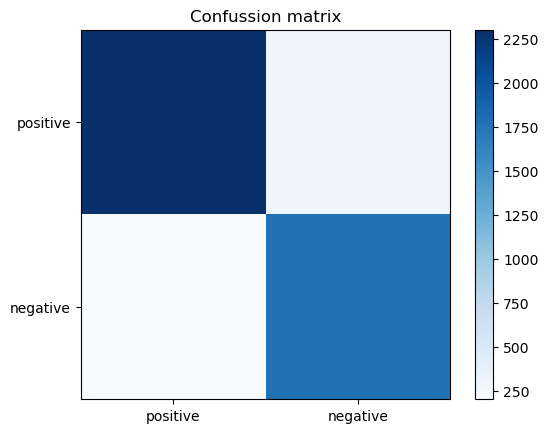

In [55]:
# visualisasi teknik evaluasi confussion matrix

plt.imshow(cm_mnb, interpolation='nearest', cmap=plt.cm.Blues) #vis imshow dari suatu array
# 

plt.colorbar()
plt.title('Confussion matrix')
labels=['positive', 'negative']
tick_marks=np.arange(len(labels)) #menjadi array 0, 1
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

Terdapat cukup banyak prediksi yang benar (true positive) sekitar 2301, lalu ada cukup banyak prediksi yang benar dari kelas 'negative'

In [56]:
cr_mnb = metrics.classification_report(y_test, y_tt_mnb_pred)
print(cr_mnb)

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2600
           1       0.86      0.90      0.88      1972

    accuracy                           0.89      4572
   macro avg       0.89      0.89      0.89      4572
weighted avg       0.89      0.89      0.89      4572



### Algoritma Linear Model: Passive Aggressive Classifier

algoritma ini cukup baik digunakan pada klasifikasi dengan data text

In [57]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_pac = PassiveAggressiveClassifier()

In [58]:
linear_pac.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [59]:
y_tt_pac_pred = linear_pac.predict(X_test)

In [60]:
acc_pac = metrics.accuracy_score(y_test, y_tt_pac_pred)
acc_pac

<IPython.core.display.Javascript object>

0.9094488188976378

In [61]:
cm_pac = metrics.confusion_matrix(y_test, y_tt_pac_pred)
cm_pac

<IPython.core.display.Javascript object>

array([[2354,  246],
       [ 168, 1804]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([<matplotlib.axis.YTick at 0x20254a21c90>,
 [Text(0, 0, 'positive'), Text(0, 1, 'negative')])

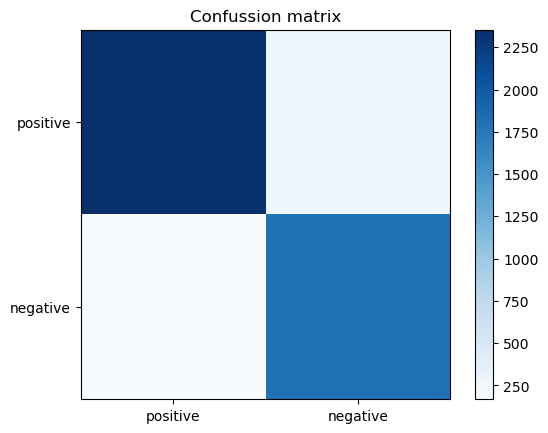

In [62]:
# viz
plt.imshow(cm_pac, interpolation='nearest', cmap=plt.cm.Blues) #vis imshow dari suatu array

plt.colorbar()
plt.title('Confussion matrix')
labels=['positive', 'negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

#### Mencari kata/fitur yang sering dipakai di berita Hoax dan Fakta

In [63]:
fitur = cvr.get_feature_names_out()

In [98]:
fitur

array(['abandon', 'abc', 'abc news', ..., 'zoo', 'zu', 'zuckerberg'],
      dtype=object)

kita cari probabilitas yang dihasilkan oleh algoritma Naive Bayes

In [110]:
log_probs = classifier.feature_log_prob_

In [111]:
log_probs

array([[ -9.05829051,  -9.51027564, -10.3575735 , ...,  -9.66442632,
        -11.45618579,  -9.66442632],
       [ -8.86060051,  -8.60928608,  -9.19707274, ..., -10.80651066,
         -8.72706912,  -9.4202163 ]])

### Berita Fakta

#### semakin besar nilai negatif nya, maka akan semakin tinggi kemungkinan berita tersebut benar pada label tersebut

In [ ]:
feature_weights_0 = classifier.feature_log_prob_[0]
feature_weights_0

In [114]:
fitur_20_0 = sorted(zip(feature_weights_0, fitur), reverse=True)[:20]

In [115]:
fitur_20_0

[(-2.934403143227554, 'new'),
 (-2.9841991883994403, 'time'),
 (-2.98797277778308, 'york'),
 (-2.988182839752133, 'new york'),
 (-3.0047051389267434, 'york time'),
 (-3.0047051389267434, 'new york time'),
 (-3.947947012298936, 'breitbart'),
 (-4.020157970625751, 'trump'),
 (-5.303453092273495, 'donald'),
 (-5.307717491059952, 'donald trump'),
 (-5.762453648174899, 'say'),
 (-6.005147333411899, 'obama'),
 (-6.058023085459847, 'clinton'),
 (-6.152880878918523, 'state'),
 (-6.1934955980727135, 'presid'),
 (-6.252179099900804, 'brief'),
 (-6.263228936087389, 'report'),
 (-6.274402236685514, 'attack'),
 (-6.291399813054085, 'hous'),
 (-6.393590753950632, 'brief new york')]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

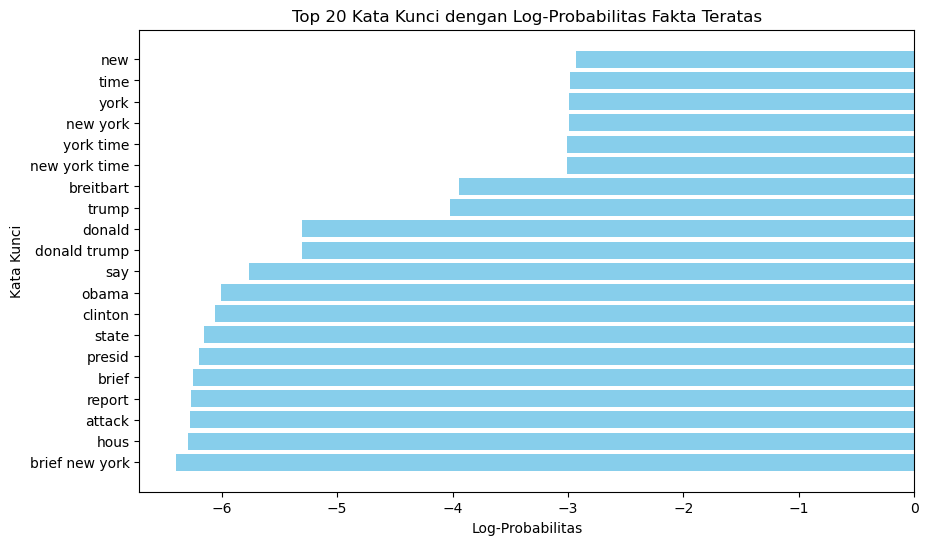

In [116]:
log_probs, keywords = zip(*fitur_20_0)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(keywords)), log_probs, color='skyblue')
plt.xlabel('Log-Probabilitas')
plt.ylabel('Kata Kunci')
plt.yticks(range(len(keywords)), keywords)
plt.title('Top 20 Kata Kunci dengan Log-Probabilitas Fakta Teratas')
plt.gca().invert_yaxis()  # Membalik urutan kata kunci
plt.show()

Hasil visualisasi menunjukkan bahwa kata atau fitur seperti 'brief new york', 'hous', 'attack', atau semua fitur yang memilki nilai log probs paling negatif menunjukkan bahwa berita dengan topik tersebut memiliki kemungkinan berita fakta.

### Berita Hoax

In [117]:
feature_weights_1 = classifier.feature_log_prob_[1]
feature_weights_1

array([ -8.86060051,  -8.60928608,  -9.19707274, ..., -10.80651066,
        -8.72706912,  -9.4202163 ])

In [118]:
fitur_20_1 = sorted(zip(feature_weights_1, fitur), reverse=True)[:20]

In [119]:
fitur_20_1

[(-3.9648951809317863, 'trump'),
 (-4.272721819476034, 'hillari'),
 (-4.368759007672977, 'clinton'),
 (-4.861090048802803, 'elect'),
 (-5.219261999009128, 'new'),
 (-5.230561554263062, 'comment'),
 (-5.269176390390841, 'video'),
 (-5.355472203843678, 'war'),
 (-5.372788653855138, 'hillari clinton'),
 (-5.394864605554338, 'us'),
 (-5.412883111057016, 'fbi'),
 (-5.483500678270969, 'vote'),
 (-5.483500678270969, 'email'),
 (-5.559486585248892, 'obama'),
 (-5.570068694579429, 'world'),
 (-5.718914322176994, 'donald'),
 (-5.743915624382411, 'donald trump'),
 (-5.8229040357010415, 'russia'),
 (-5.864868234800074, 'presid'),
 (-5.872036724278686, 'america')]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

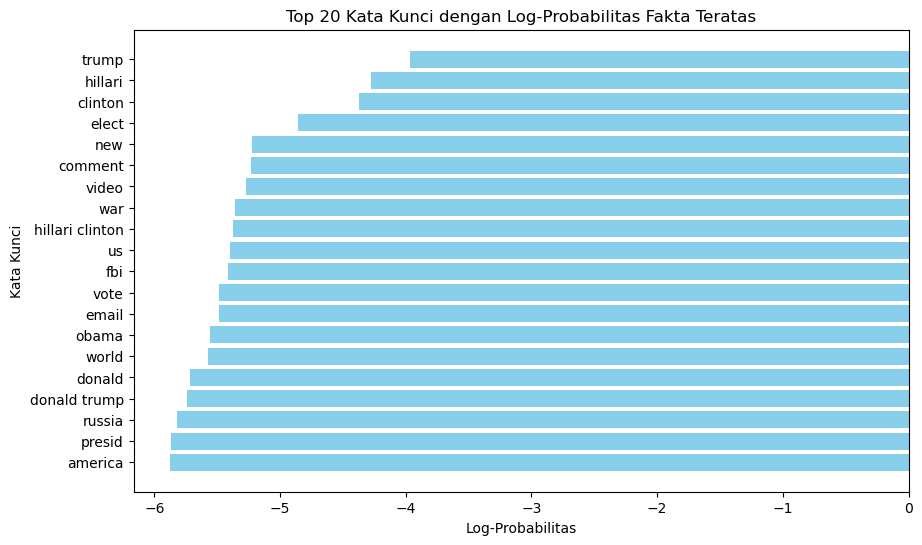

In [120]:
log_probs, keywords = zip(*fitur_20_1)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(keywords)), log_probs, color='skyblue')
plt.xlabel('Log-Probabilitas')
plt.ylabel('Kata Kunci')
plt.yticks(range(len(keywords)), keywords)
plt.title('Top 20 Kata Kunci dengan Log-Probabilitas Fakta Teratas')
plt.gca().invert_yaxis()  # Membalik urutan kata kunci
plt.show()

### Kesimpulan

#### Berita Hoax
Berdasarkan hasil visualisasi terhadap log_probs dari 20 top fitur yang memiliki nilai negatif paling tinggi. Dapat disimpulkan jika ada berita yang memiliki kata seperti 'america', 'presid', 'russia', 'donald trump', dan gabungan kata lainnya yang memiliki nilai log probsnya yang cukup tinggi nilai negatifnya. Maka akan besar kemungkinannya diprediksi sebagai berita Hoax.

Berdasarkan hasil analisis terhadap kumpulan berita hoax tersebut. Maka dapat disimpulkan bahwa cukup banyak berita hoax itu membahas mengenai pemilu yang akan atau sedang diselenggarakan pada tahun tersebut di Amerika. Hal ini dibuktikan pada setiap fitur atau kata tersebut memiliki nilai probs yang sangat negatif untuk label = '1'.

#### Deployment

In [121]:
import pickle

with open(os.path.join(path, 'NB_Hoax_News.pkl'), 'wb') as file:
    pickle.dump(classifier, file)

<IPython.core.display.Javascript object>